# ADA final exam (winter semester 2019/2020)

A friend of yours wants to start a YouTube channel and ideally earn some money via ads. However, there are so many channels and videos out there that your friend has no idea where to even start. Fortunately, they know that you have taken ADA and think you might help them out by analyzing the videos that are currently on YouTube.

The data you are provided with is a subset of YouTube videos, with videos from some of the giant channels in two categories: "Gaming" and "How-to & Style", which are the categories your friend is choosing between. The dataset contains a lot of videos, with data on those videos including their titles, their total number of views in 2019, their tags and descriptions, etc. The data is, in gzip-compressed format, contained in the `data/` folder, as the file `youtube.csv.gz`.

The three tasks A, B and C are **independent** of each other, and you can solve any combination of them. The exam is designed for more than 3 hours, so don't worry if you don't manage to solve everything; you can still score a 6.

You need to run the following two cells to read and prepare the dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
youtube = pd.read_csv('data/youtube.csv.gz', compression='gzip')
youtube.upload_date = pd.to_datetime(youtube.upload_date)

In [3]:
youtube.sample(20)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
101389,First We Feast,2016-08-25,RZA and Paul Banks Tag Team Spicy Wings | Hot ...,"['food', 'cook', 'cooking', 'kitchen', 'recipe...",949.0,1315419.0,4.926396,2160.0,3840.0,Howto & Style
25936,PlayStation,2008-12-22,PAIN: Character Intro Trailer,"['comedy', 'game']",83.0,23847.0,4.245283,720.0,1280.0,Gaming
103079,Health Tips for You,2016-11-30,आपको हिलाकर रख देंगे ...!!! नारियल तेल के 10 ग...,[],392.0,4275.0,3.400000,1080.0,1920.0,Howto & Style
78398,Sernandoe,2016-10-31,WHAT HAPPENS WHEN A WHALE IS IN FRONT OF A TRA...,"['gta 5', 'funny', 'moments']",632.0,176783.0,4.347772,720.0,1280.0,Gaming
99155,Howcast,2008-02-20,How to Juggle Three Balls,"['DIY', 'tutorial']",123.0,3281996.0,4.727656,480.0,640.0,Howto & Style
39463,Daithi De Nogla,2014-09-15,Call of Duty 4: Prop Hunt Funny Moments - Dait...,"['call', 'of', 'duty', 'call of duty', 'funny ...",313.0,718020.0,4.981967,720.0,1280.0,Gaming
93698,grav3yardgirl,2016-01-12,DISGUSTING SODA CHALLENG! ft. LEIGHANNSAYS,"['beauty', 'how to', 'makeup', 'style', 'fashi...",1290.0,1107114.0,4.932649,720.0,1280.0,Howto & Style
44904,Coffi Channel,2016-03-07,Я БАРОН КЕЙСОВ - 30 WILDFIRE КЕЙСОВ - Открыва...,[],1111.0,101521.0,4.940457,1080.0,1920.0,Gaming
38192,I AM WILDCAT,2012-08-30,I got shit on by zzirGrizz!!! @XBLzzirGrizz,['montage'],58.0,16239.0,4.927052,720.0,1280.0,Gaming
84470,BRIGHT SIDE,2018-02-13,10 Proofs the Royal Family Knows How to Be Funny,[],514.0,1147829.0,4.749471,1080.0,1920.0,Howto & Style


## Dataset description

Each row of the dataset corresponds to one video that was uploaded to YouTube. There are 11 columns:
'channel', 'upload_date', 'title', 'categories', 'tags', 'duration',
       'view_count', 'average_rating', 'height', 'width', 'channel_cat'.
- `channel`: The channel (account) on which the video was uploaded.
- `upload_date`: The date on which the video was uploaded (Pandas Timestamp object).
- `title`: The title of the video.
- `tags`: A list of words that describe the video.
- `duration`: The duration of the video in seconds.
- `view_count`: The number of times the video was watched.
- `average_rating`: The average score with which the viewers rated the video (1-5).
- `height`: The height of the video in pixels.
- `width`: The width of the video in pixels.
- `channel_cat`: The category of the channel on which this video was uploaded. This dataset only contains videos from channels from the 'Gaming' and the 'Howto & Style' category.

# Task A: Welcome to the exam!

All of Task A refers to the videos that were published between and including 2010 and 2018.

In [4]:
# lets check that
print(youtube.upload_date.min())
print(youtube.upload_date.max())

2005-12-28 00:00:00
2019-10-03 00:00:00


In [5]:
# lets enforce it
youtube_A = youtube[youtube.upload_date.apply(lambda d: True if d.year >= 2010 and d.year <= 2018 else False)].copy()
print(youtube_A.upload_date.min())
print(youtube_A.upload_date.max())

2010-01-01 00:00:00
2018-12-31 00:00:00


## A1: A growing platform?

You would first like to know whether YouTube in general is the right platform to invest time into.

1. Using the appropriate plot type, plot the number of videos published per year between and including 2010 and 2018.

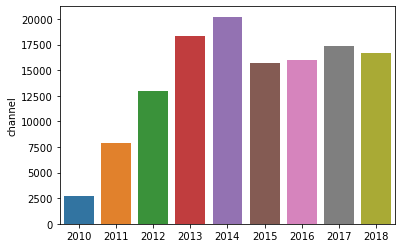

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

years = np.array(range(2010, 2018 + 1))
youtube_A["year"] = youtube_A.upload_date.dt.year
video_per_year = youtube_A.groupby("year")["channel"].count()

sns.barplot(x=years, y=video_per_year)
plt.show()

2. Now for each year, plot the number of channels that have been created between the beginning of 2010 and the end of that year. A channel is considered to be created at the time at which they upload their first video.

In [7]:
youtube_A["video_number"] = youtube_A.sort_values("upload_date", ascending=False).groupby("channel").cumcount(
    ascending=False) + 1
youtube_A[youtube_A["channel"] == "PopularMMOs"].sort_values("upload_date", ascending=True)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,video_number
7298,PopularMMOs,2013-12-19,HEROBRINE VS SUPERMAN - Minecraft Mod Battle -...,"['animation', 'trolling', 'mod', 'mods', 'show...",657.0,2320968.0,4.872358,720.0,1280.0,Gaming,2013,1
7297,PopularMMOs,2013-12-20,NAGA VS ENDER KNIGHT - Minecraft Mob Battles -...,"['zombie', 'mod', 'mods', 'showcase', 'spotlig...",554.0,1082679.0,4.839161,1080.0,1920.0,Gaming,2013,3
7296,PopularMMOs,2013-12-20,Minecraft: LAND OF THE DINOSAURS (NEW DIMENSIO...,"['new', 'mod', 'mods', 'map', 'how to', 'tutor...",390.0,781364.0,4.886988,720.0,1280.0,Gaming,2013,2
7295,PopularMMOs,2013-12-21,MUTANT SKELETON VS GREEN ARROW - Minecraft Mod...,"['spotlight', 'map', 'animation', 'parody']",532.0,972343.0,4.908288,720.0,1280.0,Gaming,2013,4
7294,PopularMMOs,2013-12-21,"Minecraft: MUTANT CHICKEN (MASSIVE, VALUABLE, ...","['minecraft', 'mod', 'mods', 'minecraft mods',...",538.0,2016460.0,4.874803,720.0,1280.0,Gaming,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6303,PopularMMOs,2015-03-11,Minecraft: THE DROPPER BATHROOM HUNGER GAMES -...,"['minecraft', 'games', 'minecraft mods', 'mods...",1131.0,8183821.0,4.892672,720.0,1280.0,Gaming,2015,996
6302,PopularMMOs,2015-03-11,Minecraft: SPRING TRAP CHALLENGE GAMES - Lucky...,"['minecraft', 'challenge', 'funny moments', 'm...",1666.0,5840361.0,4.903166,720.0,1280.0,Gaming,2015,997
6301,PopularMMOs,2015-03-12,Minecraft: HOW TO GET A GIRLFRIEND QUEST - Cus...,"['minecraft', 'custom', 'mod', 'challenge', 'a...",1354.0,7668071.0,4.899123,720.0,1280.0,Gaming,2015,998
6300,PopularMMOs,2015-03-12,Minecraft: FIVE NIGHTS AT FREDDY'S 3 MOD (NEW ...,"['minecraft', 'games', 'showcase', 'spotlight'...",847.0,4690072.0,4.894059,720.0,1280.0,Gaming,2015,999


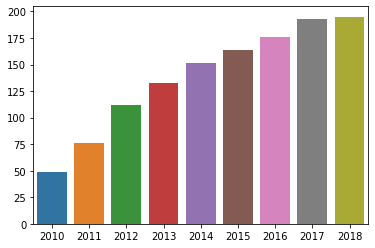

In [8]:
first_videos = youtube_A[youtube_A["video_number"] == 1]
channels_per_year = [first_videos[first_videos["year"] <= year]["channel"].count() for year in years]
sns.barplot(x=years, y=channels_per_year)
plt.show()

3. Normalize the number of videos published each year by the number of channels that have been created between the beginning of 2010 and the end of that year, and plot these quantities. Do seperate plots for gaming channels, how-to channels, and both together. Can you conclude from the plot that both gaming and how-to channels have been becoming less and less active recently? Why, or why not?

In [9]:
youtube_A["channel_cat"].value_counts()

Gaming           78507
Howto & Style    49356
Name: channel_cat, dtype: int64

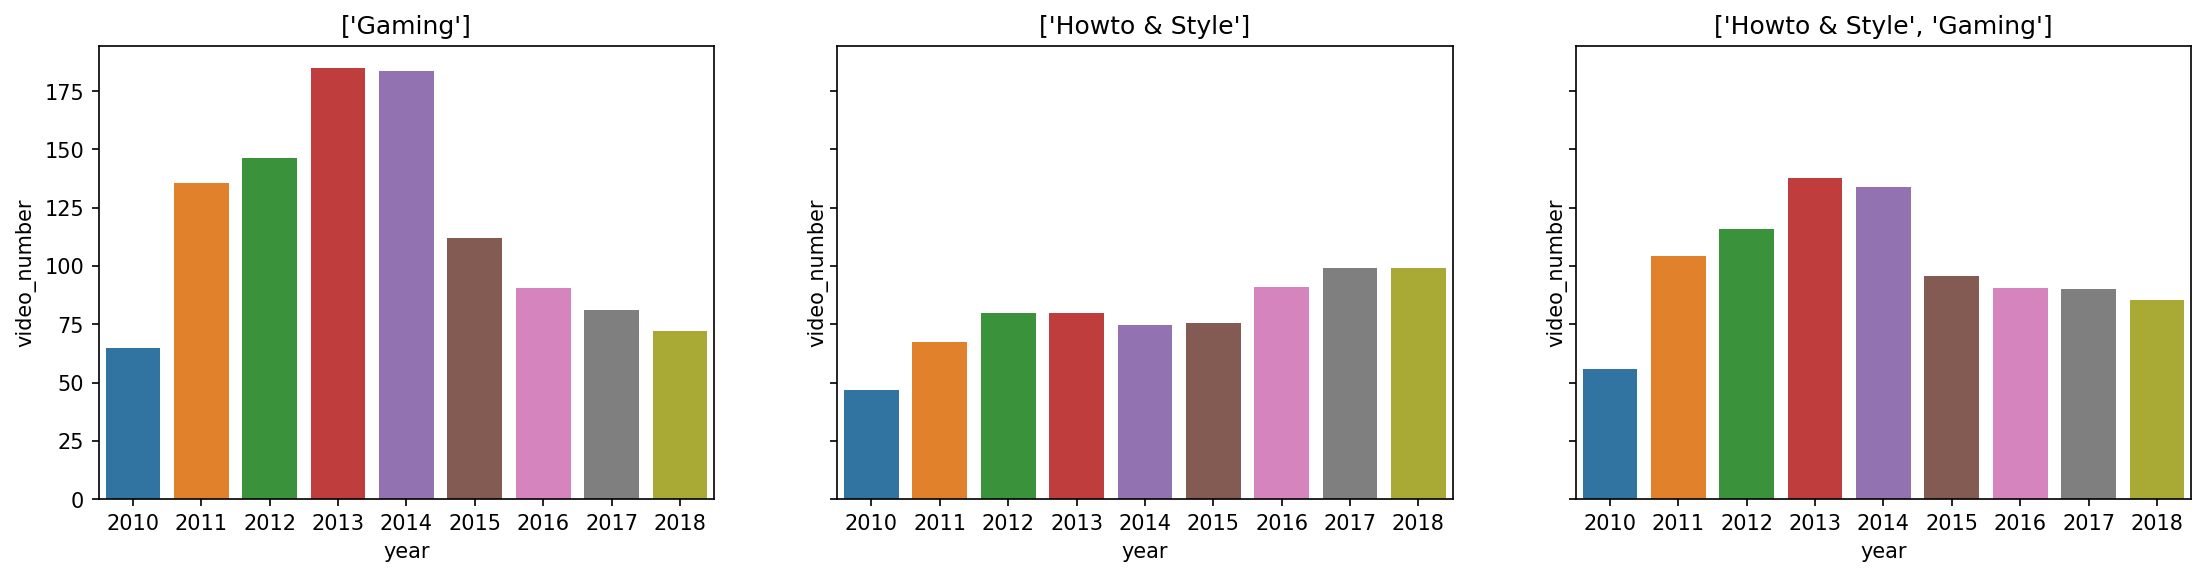

In [10]:
fig, axs = plt.subplots(1, 3, dpi=150, figsize=(18, 4), sharex=True, sharey=True)

for i, cats in enumerate([["Gaming"], ["Howto & Style"], ["Howto & Style", "Gaming"]]):
    first_videos = youtube_A[youtube_A["video_number"] == 1]
    first_videos = first_videos[first_videos["channel_cat"].isin(cats)]
    channels_per_year = [first_videos[first_videos["year"] <= year]["channel"].count() for year in years]

    vids_per_year = youtube_A[youtube_A["channel_cat"].isin(cats)].groupby("year")["video_number"].count()
    normalized_vids_per_year = vids_per_year / channels_per_year
    axs[i].set_title(cats)
    axs[i].set_xlabel("year")
    sns.barplot(x=years, y=normalized_vids_per_year, ax=axs[i])
plt.show()

**Comment:**

Gaming has become less and less active per channel (2015-2018), whereas howto increased somewhat (2016-2018). I normalized them separately. Is Gaming really becoming less and less active? I would not be so sure since the number of channels created in a category might be a misleading normalization, since it could be the case that the majority of new channels are amateur trials, whereas Howto new channels are more directed towards surviving and succeeding. Con-founders are everywhere!

---

## A2: The one thing we all love: cash money

Your friend is really keen on making money from their YouTube channel through ads and wants you to help them choose the most profitable channel category (Gaming or Howto & Style). The ad profit is directly proportional to the number of views of a video.

1. Since your friend wants to keep producing videos for several years to come, it might also be worth looking at the growth of the two categories.
  1. Compute the total number of views in each category per year for the years 2010-2018.
  2. Divide the yearly view count by the number of channels that posted a video in each category in each year. Plot these normalized counts.




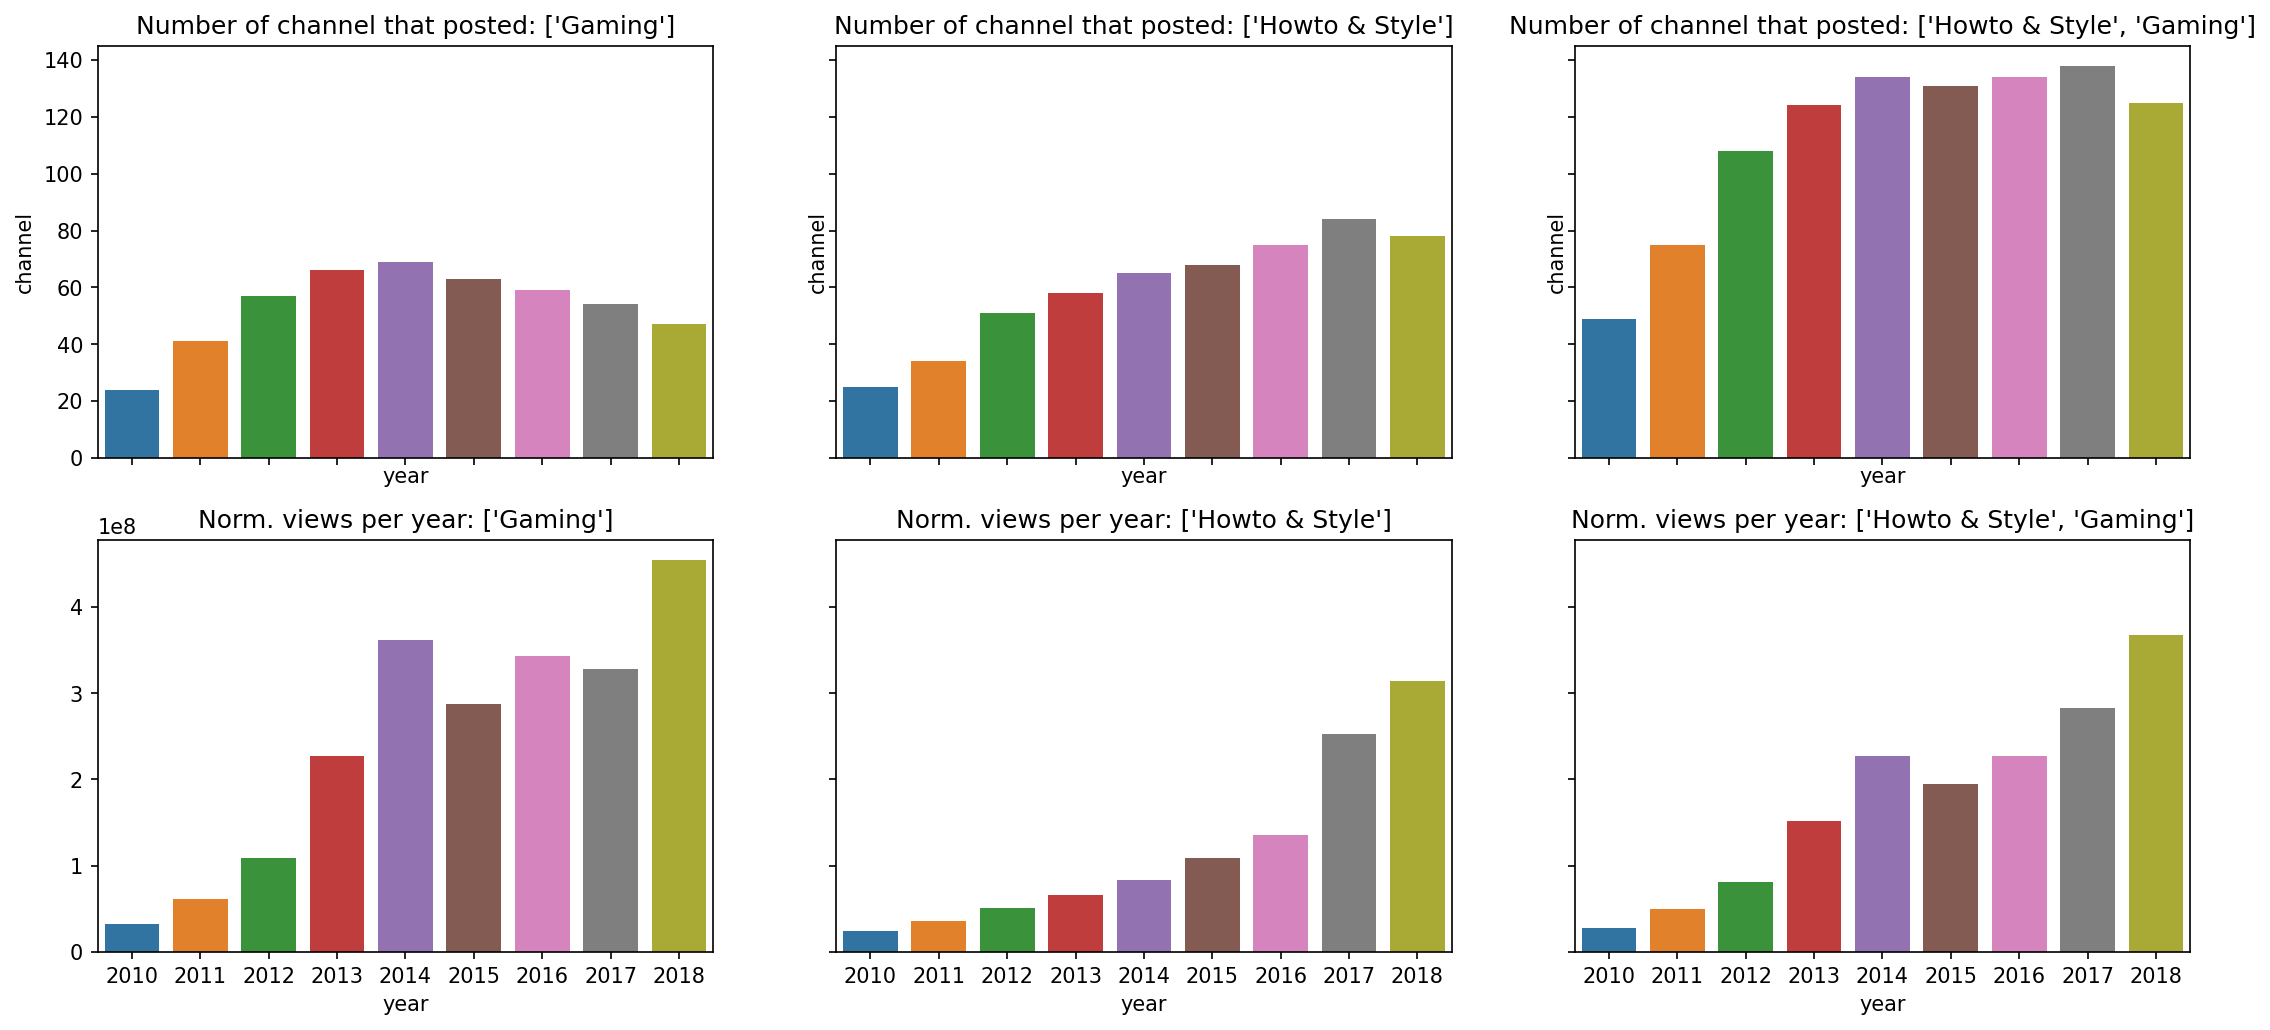

In [11]:
fig, axs = plt.subplots(2, 3, dpi=150, figsize=(18, 8), sharex=True, sharey="row")

for i, cats in enumerate([["Gaming"], ["Howto & Style"], ["Howto & Style", "Gaming"]]):
    category_videos = youtube_A[youtube_A["channel_cat"].isin(cats)]
    views_per_year = category_videos.groupby("year")["view_count"].sum()
    channel_posts_per_year = category_videos.groupby("year")["channel"].nunique()

    normalized_views_per_year = views_per_year / channel_posts_per_year

    axs[0, i].set_title(f"Number of channel that posted: {cats}")
    axs[0, i].set_xlabel("year")
    sns.barplot(x=years, y=channel_posts_per_year, ax=axs[0, i])

    axs[1, i].set_title(f"Norm. views per year: {cats}")
    axs[1, i].set_xlabel("year")
    sns.barplot(x=years, y=normalized_views_per_year, ax=axs[1, i])
plt.show()

2. Your friend's channel will be brand new, so you decide to look more closely at newer channels. For this question and all the following questions in A2, only consider channels that uploaded their first video in  2016 or later. Compute the total number of views in each category and divide it by the number of channels in that category.


In [12]:
youtube_A2 = youtube_A[youtube_A["year"] >= 2016].copy()
youtube_A2.year.min()

2016

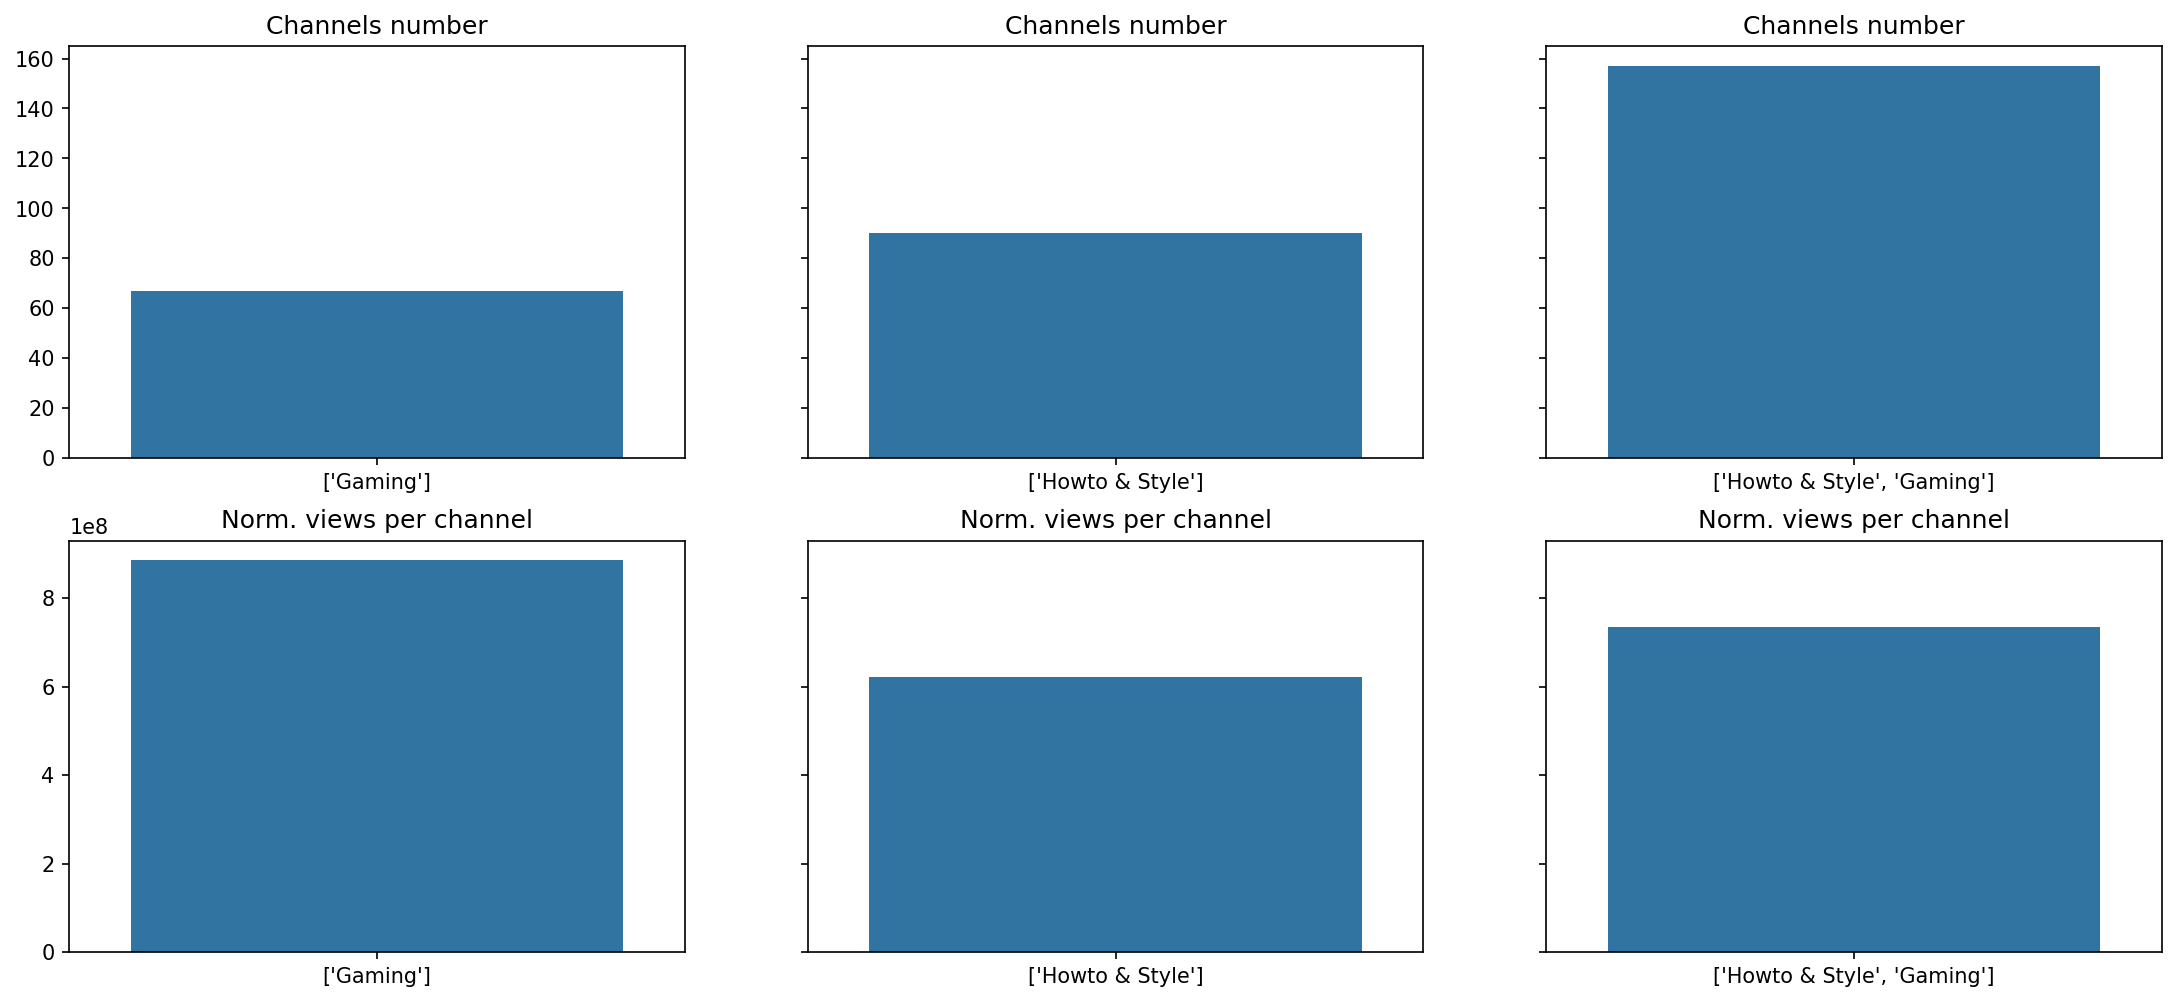

In [13]:
fig, axs = plt.subplots(2, 3, dpi=150, figsize=(18, 8), sharey="row")

for i, cats in enumerate([["Gaming"], ["Howto & Style"], ["Howto & Style", "Gaming"]]):
    category_videos = youtube_A2[youtube_A2["channel_cat"].isin(cats)]
    views = category_videos["view_count"].sum()
    channels = category_videos["channel"].nunique()

    axs[0, i].set_title(f"Channels number")
    # axs[0, i].set_xlabel("channel")
    sns.barplot(x=[str(cats)], y=[channels], ax=axs[0, i])

    axs[1, i].set_title(f"Norm. views per channel")
    # axs[1, i].set_xlabel("channel")
    sns.barplot(x=[str(cats)], y=[views / channels], ax=axs[1, i])
plt.show()

**Comment:**

gaming is higher here.

---

3. The number of views might be very unevenly over the different channels, and channels might upload different numbers of videos.
  1. Compute the mean number of views per video for each channel.
  2. Compute the mean of these means for each of the two categories. Print these values.
  3. Using bootstrapping, compute 95% confidence intervals for these two means. From this analysis, can you draw a recommendation for one of the two categories? Why, or why not?

In [14]:
from scipy.stats import bootstrap

for i, cats in enumerate([["Gaming"], ["Howto & Style"]]):
    category_videos = youtube_A2[youtube_A2["channel_cat"].isin(cats)]

    means = category_videos.groupby("channel")["view_count"].mean()
    mean_mean = means.mean()

    ci95 = bootstrap(
        means.to_numpy()[None, :],
        np.mean,
        confidence_level=0.95,
        method="percentile",
        n_resamples=10000,
        random_state=72
    ).confidence_interval
    print(f"*** Category: {cats}")
    print(f"mean of means: \t{mean_mean:.2f}")
    print(f"95% ci of mean:\t{ci95}")
    print()

*** Category: ['Gaming']
mean of means: 	3684361.10
95% ci of mean:	ConfidenceInterval(low=2544174.8047929145, high=5093166.318991874)

*** Category: ['Howto & Style']
mean of means: 	3200114.74
95% ci of mean:	ConfidenceInterval(low=2266053.8370359507, high=4488652.794988802)



**Comment:**

Unfortunately, from this analysis, we cannot draw a recommendation for one of the two categories because the uncertainties are too high as the confidence intervals are too wide. However, we do note that the mean of the gaming category is higher and has a confidence interval that is set up to be higher than the howto interval. But given the low confidence aka wide CIs, I would not recommend my friend to pick any category based on these results. More analysis needed.

---

# Task B: View forecasting (Machine Learning)

Your friend wants to figure out how they can optimize their videos for getting the maximum number of views (without using shocking thumbnails and clickbait titles). In this task, you will build a machine learning (ML) model for predicting the success of a video.

## B1: Get those shovels out again

1. For the prediction model, use all rows of the dataset, but keep only the following columns: `view_count, channel, upload_date, duration, average_rating, height, width`.

In [15]:
youtube_B = youtube[["view_count", "channel", "upload_date", "duration", "average_rating", "height", "width"]].copy()
youtube_B.head()

,view_count,channel,upload_date,duration,average_rating,height,width
0,2541550.0,PewDiePie,2013-03-04,1126.0,4.886102,720.0,1280.0
1,1727646.0,PewDiePie,2013-03-04,903.0,4.951531,720.0,1280.0
2,1402747.0,PewDiePie,2013-03-04,806.0,4.962706,720.0,1280.0
3,4348296.0,PewDiePie,2013-03-03,909.0,4.937665,720.0,1280.0
4,1410659.0,PewDiePie,2013-03-03,834.0,4.957545,720.0,1280.0


2. Extract the upload year and upload month from the `upload_date` column into the two columns `upload_year` and `upload_month`, and remove `upload_date`.

In [16]:
youtube_B["upload_year"] = youtube_B.upload_date.dt.year
youtube_B["upload_month"] = youtube_B.upload_date.dt.month
youtube_B.drop("upload_date", axis=1, inplace=True)
youtube_B.head()

,view_count,channel,duration,average_rating,height,width,upload_year,upload_month
0,2541550.0,PewDiePie,1126.0,4.886102,720.0,1280.0,2013,3
1,1727646.0,PewDiePie,903.0,4.951531,720.0,1280.0,2013,3
2,1402747.0,PewDiePie,806.0,4.962706,720.0,1280.0,2013,3
3,4348296.0,PewDiePie,909.0,4.937665,720.0,1280.0,2013,3
4,1410659.0,PewDiePie,834.0,4.957545,720.0,1280.0,2013,3


3. The entry in the channel column for a video indicates on which channel the video was uploaded. Encode this column via one-hot encoding.

In [17]:
youtube_B = pd.get_dummies(youtube_B)
youtube_B.head()

,view_count,duration,average_rating,height,width,upload_year,upload_month,channel_5-Minute Crafts,channel_5-Minute Crafts GIRLY,channel_5-Minute Crafts PLAY,...,channel_grav3yardgirl,channel_iHasCupquake,channel_jacksepticeye,channel_jaipurthepinkcity,channel_jeffreestar,channel_speedyw03,channel_stampylonghead,channel_theRadBrad,channel_videogamedunkey,channel_windy31
0,2541550.0,1126.0,4.886102,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1727646.0,903.0,4.951531,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1402747.0,806.0,4.962706,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4348296.0,909.0,4.937665,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1410659.0,834.0,4.957545,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Split the data into a train (70%) and a test set (30%) with the appropriate function from sklearn, using 42 as the random seed.

In [18]:
from sklearn.model_selection import train_test_split

features = youtube_B.columns.to_list()
features.remove("view_count")

X = youtube_B[features]
y = youtube_B["view_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Number of train samples:', X_train.shape[0])
print('Number of train features:', X_train.shape[1])
print('Number of test labels:', y_train.shape[0])
print()
print('Number of test samples:', X_test.shape[0])
print('Number of test features:', X_test.shape[1])
print('Number of test labels:', y_test.shape[0])

Number of train samples: 41852
Number of train features: 201
Number of test labels: 41852

Number of test samples: 97655
Number of test features: 201
Number of test labels: 97655


## B2: Who is the most viewed of them all?

1. Train a ridge regression model (i.e., an L2-regularized linear regression model) on the train set that predicts the view count from the other features. Find and use the optimal regularization parameter $\alpha$ from the set {0.001, 0.01, 0.1} via 3-fold cross validation.

In [19]:
alphas = [0.001, 0.01, 0.1]
cv = 3

from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=alphas, cv=cv)
model.fit(X_train, y_train)

print(f"Best alpha was {model.alpha_} with a score of {model.best_score_}")

Best alpha was 0.1 with a score of 0.016874333678229065


2. Report the mean absolute error that the model makes on the test set.

In [20]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean absolute error (MAE) on test: {mae:.4f}")

Mean absolute error (MAE) on test: 1493888.2143


## B3: Checking our ambitions

To improve performance, you want to make the task of the ML model easier and turn it into a classification task. Now it only has to predict whether a video has a high view count (defined as being larger than the median of the view counts in the training set) or a low view count (defined as being smaller or equal to the median of the view counts in the training set).

1. Train a logistic regression model for this classification task. Find and use the optimal regularization parameter C (as defined in scikit-learn's documentation) from the set {1, 10, 100} via 3-fold cross validation. Use the random seed 42. _Hint_: If you get a warning about the training algorithm failing to converge, increase the maximum number of training iterations.

In [21]:
train_median = y_train.median()
train_median

430378.0

In [22]:
y_train_bin = np.array(y_train > train_median, dtype=int)
y_test_bin = np.array(y_test > train_median, dtype=int)
y_train[:5].values, y_train_bin[:5]

(array([ 122930.,  300751.,   84307., 2979521., 1658351.]),
 array([0, 0, 0, 1, 1]))

In [23]:
from sklearn.linear_model import LogisticRegressionCV

cs = [1, 10, 100]  # 1.6
cv = 3

model = LogisticRegressionCV(Cs=cs, cv=cv, solver='lbfgs', max_iter=10000, random_state=42)
model.fit(X_train, y_train_bin)

print(f"Best c is {model.C_}")

Best c is [1]


2. Compute the accuracy of the logistic regression model on the test set.

In [24]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test_bin, y_pred)

print(f"Accuracy of best model is on the test set is: {acc * 100:.2f}%")

Accuracy of best model is on the test set is: 74.34%


## B4: ...something's not right.

You are satisfied with the model performance. In fact, you are a bit surprised at how good the model is given the relatively little amount of information about the videos. So you take a closer look at the features and realize that the (one-hot-encoded) channel feature does not make sense for the application that your friend has in mind.

1. Why does the channel feature not make sense?

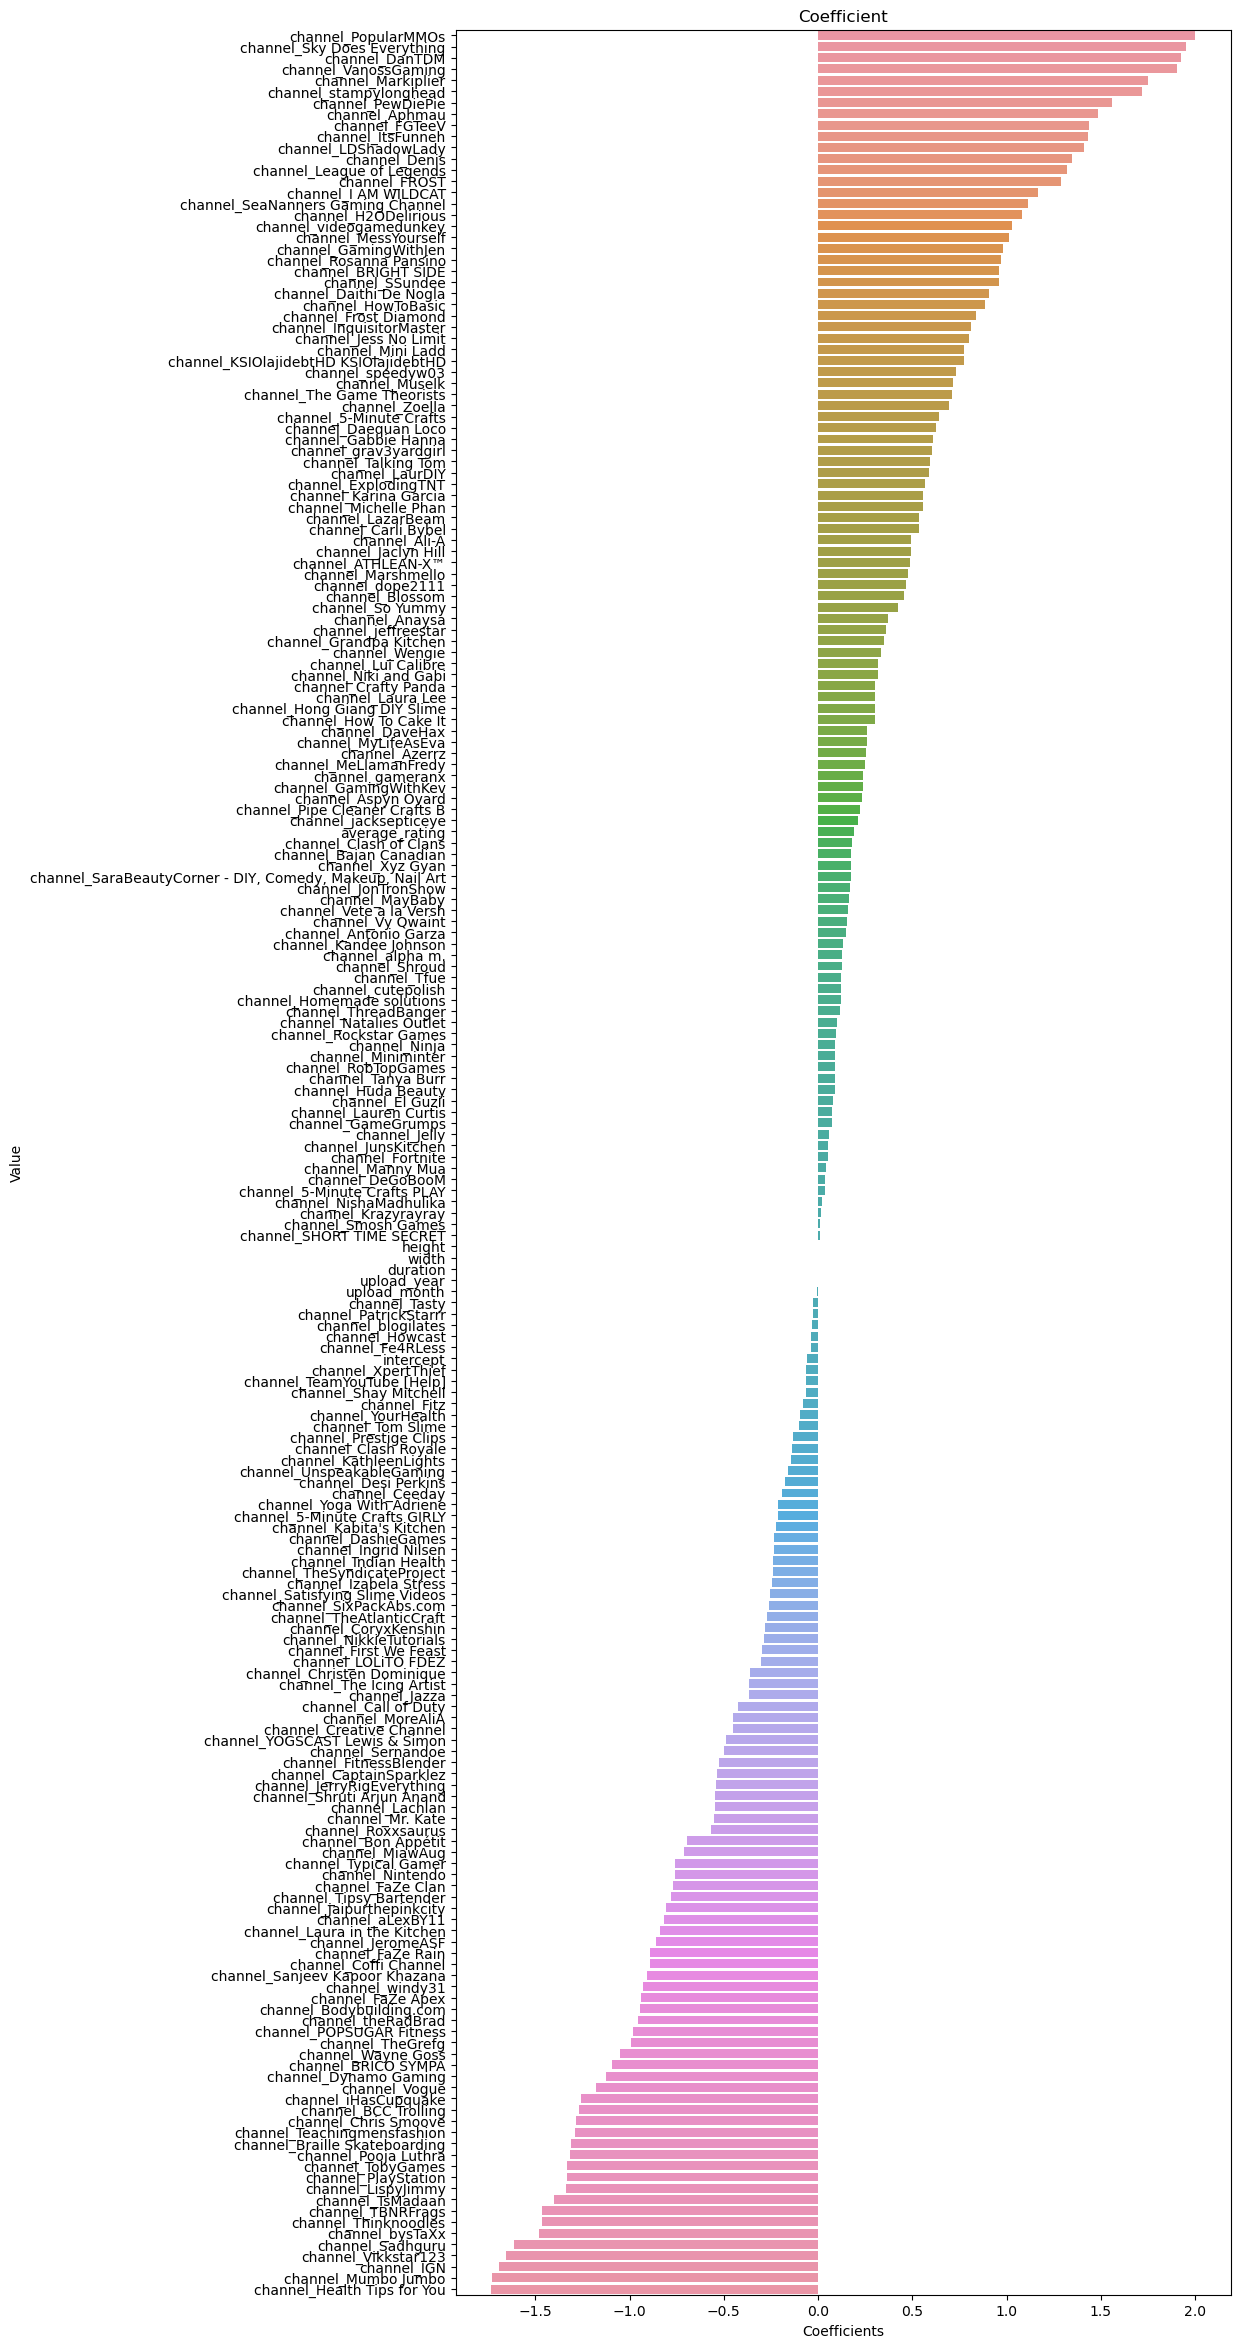

In [25]:
fig = plt.figure(figsize=(10, 30), dpi=100)
ax = fig.gca()

ax.set_xlabel("Coefficients")
ax.set_ylabel("Value")
ax.set_title("Coefficient")

pairs = list(zip(model.coef_[0], X_train.columns))
pairs = [(model.intercept_[0], "intercept")] + pairs
pairs = list(reversed(sorted(pairs)))
# print(pairs)
sns.barplot(x=[p[0] for p in pairs], y=[p[1] for p in pairs], ax=ax)

plt.show()
plt.close()

**Comment:**

It does not make sense because the model just learned which channels are more successful than others and thus have more views. This can be observed if the weights of the coefficients are observed: the channel one hot indicators have ultra high coefficient values, whereas the othe features are all around zero. This model would be useles for our friend whose channel is brand new, and also does not learn anything useful for other appliations (nothing that we didn't know with simple statistics).

---

2. Train another logistic regression model with all the features from B3 except the one-hot-encoded channel. Use again 42 as the seed for the train test split and perform the same hyperparameter optimization as in B3. How does the model performance change?

In [26]:
clean_features = [f for f in features if not f.startswith("channel")]
clean_features

['duration',
 'average_rating',
 'height',
 'width',
 'upload_year',
 'upload_month']

In [31]:
cs = [1, 10, 100]  # 1.6
cv = 3
model = LogisticRegressionCV(Cs=cs, cv=cv, solver='lbfgs', max_iter=10000, random_state=42)
model.fit(X_train[clean_features], y_train_bin)
print(f"Best c is {model.C_}")

Best c is [10]


In [33]:
y_pred = model.predict(X_test[clean_features])
acc = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy of best model is on the test set is: {acc * 100:.2f}%")

Accuracy of best model is on the test set is: 60.84%


**Comment:**

Now the accuracy much lower, as expected. Note that random guessing gives 50%, so this is quite low, but lower as expected since we removed a useful feature to learn by heart.

---

## B5: "We kinda forgot about categories."

On second thought, there is actually one feature that you may use about the channel. Namely, the channel category. The reason this one makes sense might also help you answer B4.1.

1. Train and evaluate another logistic regression model (in the same way as in B4 regarding train/test split and hyperparameter) that additionally includes the one-hot-encoded channel category.

In [38]:
def add_onehot_category(df):
    return pd.get_dummies(df.join(youtube[["channel_cat"]]))


X_train_b5 = add_onehot_category(X_train[clean_features])
X_test_b5 = add_onehot_category(X_test[clean_features])

X_train_b5.head()

,duration,average_rating,height,width,upload_year,upload_month,channel_cat_Gaming,channel_cat_Howto & Style
20432,714.0,4.951566,720.0,1280.0,2011,9,1,0
33843,897.0,4.812629,1080.0,1920.0,2012,12,1,0
42564,648.0,4.969989,720.0,1280.0,2011,2,1,0
45060,1761.0,4.823359,1080.0,1920.0,2015,12,1,0
51454,95.0,4.911907,1080.0,1920.0,2012,10,1,0


In [39]:
cs = [1, 10, 100]  # 1.6
cv = 3
model = LogisticRegressionCV(Cs=cs, cv=cv, solver='lbfgs', max_iter=10000, random_state=42)
model.fit(X_train_b5, y_train_bin)
print(f"Best c is {model.C_}")

Best c is [10]


In [40]:
y_pred = model.predict(X_test_b5)
acc = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy of best model is on the test set is: {acc * 100:.2f}%")

Accuracy of best model is on the test set is: 61.43%


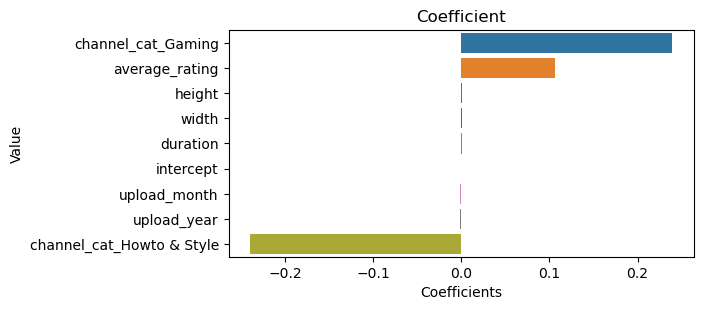

In [43]:
fig = plt.figure(figsize=(6, 3), dpi=100)
ax = fig.gca()

ax.set_xlabel("Coefficients")
ax.set_ylabel("Value")
ax.set_title("Coefficient")

pairs = list(zip(model.coef_[0], X_train_b5.columns))
pairs = [(model.intercept_[0], "intercept")] + pairs
pairs = list(reversed(sorted(pairs)))
# print(pairs)
sns.barplot(x=[p[0] for p in pairs], y=[p[1] for p in pairs], ax=ax)

plt.show()
plt.close()

2. The dynamics of the two categories might differ a lot, and the two communities might value different properties of a video differently. For instance, for one community, a long duration might be more important, for the other one, a large picture width. Thus, having only a single weight for, e.g., the duration of a video, might not give the best results. Is there something smarter that you can do than simply including the category as a single one-hot-encoded feature to improve the classification performance? Implement your idea and compare the accuracy on the test set with that of the first model (from task B5.1).

**Comment:**

Well, one idea is to train separate models, so that they can learn separate coefficients (or use an simple MLP to allow it deeper connections).

---

Category Gaming
---------------
Best c is [1]
Accuracy of best model is on the test set is: 62.89%

Category Howto & Style
----------------------
Best c is [1]
Accuracy of best model is on the test set is: 64.85%



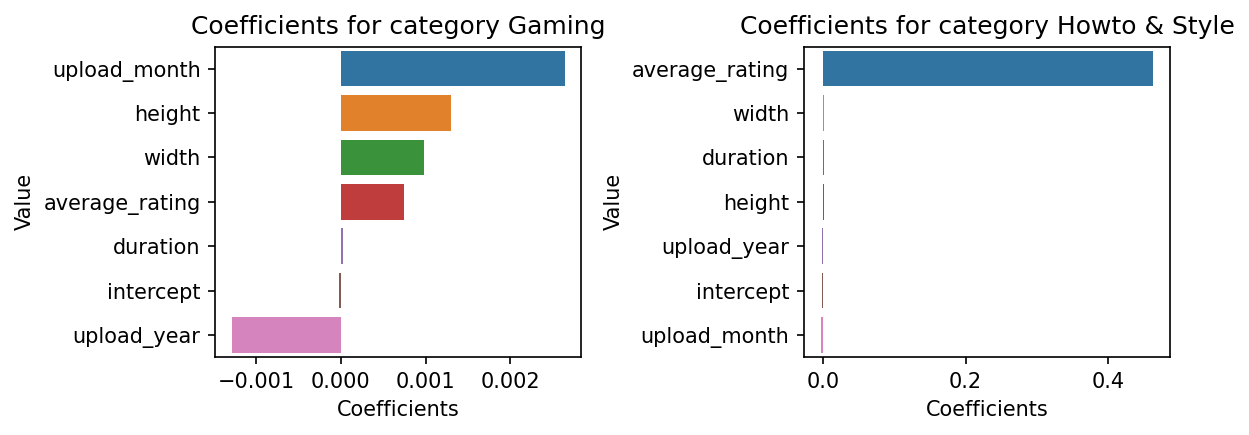

In [55]:
categories = [("Gaming"), ("Howto & Style")]

cs = [1, 10, 100]  # 1.6
cv = 3

fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3))
models = []
for i, cat in enumerate(categories):
    print("Category", cat)
    print("-" * len("Category " + cat))

    take_category = lambda df, cat: df[df[f"channel_cat_{cat}"] == 1][clean_features]
    X_train_cat = take_category(X_train_b5, cat)
    X_test_cat = take_category(X_test_b5, cat)
    y_train_bin_cat = y_train_bin[X_train_b5.index.isin(X_train_cat.index)]
    y_test_bin_cat = y_test_bin[X_test_b5.index.isin(X_test_cat.index)]

    # 1. train
    model = LogisticRegressionCV(Cs=cs, cv=cv, solver='lbfgs', max_iter=10000, random_state=42)
    model.fit(X_train_cat, y_train_bin_cat)
    print(f"Best c is {model.C_}")
    models.append(model)

    # 2. evaluate
    y_pred = model.predict(X_test_cat)
    acc = accuracy_score(y_test_bin_cat, y_pred)
    print(f"Accuracy of best model is on the test set is: {acc * 100:.2f}%\n")

    # 3. plot weights
    axs[i].set_xlabel("Coefficients")
    axs[i].set_ylabel("Value")
    axs[i].set_title(f"Coefficients for category {cat}")

    pairs = list(zip(model.coef_[0], X_train_cat.columns))
    pairs = [(model.intercept_[0], "intercept")] + pairs
    pairs = list(reversed(sorted(pairs)))
    # print(pairs)
    sns.barplot(x=[p[0] for p in pairs], y=[p[1] for p in pairs], ax=axs[i])

plt.tight_layout()
plt.show()
plt.close()

**Comment:**

We did get higher accuracies and we can indeed see that the coefficients are way different.

---

# Task C: A map of the channels (Graphs)

Your friend wants to map out the channels and represent their similarities. For this purpose, we have created two undirected and unweighted graphs for you, where in each graph, each channel has a node and similar channels have edges connecting them. In one graph, the similarity between two channels is based on how similar their video descriptions are, while in the other, the similarity is based on how similar their video tags are. We will call the former $G_{text}$ and the latter $G_{tags}$. You will be analyzing the two graphs loaded by running the cell below.

In [56]:
from networkx import from_numpy_array
import json

g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

## C1: Does YouTube have a content diversity problem?

1. For each graph, calculate its diameter (i.e., the largest shortest-path length, where the maximization is done over all node pairs). What difference do you see? _Hint_: Don't worry if you get an error, just read the error message carefully.

In [69]:
import networkx as nx

graphs = [("G_text", g_text), ("G_tags", g_tags)]

for gname, g in graphs:
    print(f"Graph {gname}")
    print("-" * len(f"Graph {gname}"))
    if nx.is_connected(g):
        d = nx.diameter(g, usebounds=True)
        print(f"Diameter: {d}")
    else:
        print("Graph is not connected")
        for i, comp in enumerate(nx.connected_components(g)):
            d = nx.diameter(g.subgraph(comp))
            print(f"Component {i} has {len(comp)} nodes and diameter of {d}")
        # print(f"Diameters: {ds}")
    print()


Graph G_text
------------
Diameter: 2

Graph G_tags
------------
Graph is not connected
Component 0 has 194 nodes and diameter of 2
Component 1 has 1 nodes and diameter of 0



2. What does the diameter of $G_{text}$ say about the diversity of the channels’ contents? How about the diameter of $G_{tags}$?

**Comment:**

The diameter of both graphs is only 2, which means that all channels are very close in similarity to one another, with the furthest channel being only one step away from someone who is similar to them. Exceptionally, Gtags has a disconnect componen of size 1, which might mean that that one channel is very peculiar and different in some sense.

---


3. Based on what you have calculated, which one has greater diversity: descriptions used by channels, or tags used by channels? Justify your answer.

**Comment:**

Tags sligltly because of the one unusual channel, judging on the results. But the diameter is not a very rich measure and should not be trusted by much for some wide ranging conclusions. For more conclusions, more analysis needs to be done on the graph, like average path, visualizing the graph, performing clustering, etc.

---

4. Imagine that you want to **compare** content diversity between two sets of channels (i.e., you want to see which set of channels has more diverse content), and you have calculated a tag-based graph for each set. Do you think the diameter is a good measure for doing the comparison? Justify your answer.

**Comment:**

In this case and as discussed above, other measures would be better, like average path, clustering coefficients, average degree, conductance, etc.

---

5. Back to our own two graphs. Based on $G_{text}$, for each category of channels, which channel is the one most representative of the contents of all channels in that category? In other words, for each category, if you needed to provide a summary of all channels in the category via one channel, which channel would you choose? Show us (us being the exam designers and your friend) the descriptions of this channel’s two most-viewed videos. What metric did you use for this purpose? Explain your choice.

**Comment:**

I used the closeness centrality as it finds it measures how close the node is on average to other nodes. In this case it means which channel has the most similar desciptions to other channels on average. Note that there are some ties, so I pick on random one (the first one in the returned results). I find for the winner of HowTo category two descriptions on youtube and put them in markdown below.

---


In [131]:
channel_to_category = youtube.groupby("channel")["channel_cat"].first()
channel_to_category.loc["Desi Perkins"]

'Howto & Style'

In [132]:
index_to_channel = {v: k for k, v in channel_to_index.items()}
index_to_category = {index: channel_to_category.loc[channel] for index, channel in index_to_channel.items()}
index_to_category[channel_to_index["Desi Perkins"]]

'Howto & Style'

In [133]:
for _, g in graphs:
    nx.set_node_attributes(g, index_to_category, 'Category')
g_text.nodes[1]

for cat in categories:
    g_text_category = g_text.subgraph([x for x, y in g_text.nodes(data=True) if y['Category'] == cat])

    bc = sorted(nx.closeness_centrality(g_text_category).items(), key=lambda kv: -kv[1])[:20]
    print(f"There are some ties (i will take the first one):{bc[:2]}")
    print(f"Winner for category {cat} is: {index_to_channel[bc[0][0]]}")


There are some ties (i will take the first one):[(2, 1.0), (16, 1.0)]
Winner for category Gaming is: SSundee
There are some ties (i will take the first one):[(1, 1.0), (6, 1.0)]
Winner for category Howto & Style is: Desi Perkins


In [134]:
"""2 YouTube video descriptions for the winner of howto category: Desi Perkins"""

'2 YouTube video descriptions for the winner of howto category: Desi Perkins'

VIDEO 1:
```
Updated Eyebrow Tutorial Here
http://bit.ly/1FVly5p

♡ Like and Subscribe:)
Subscribe here: http://bit.ly/desiperkins
SNAPCHAT: Desiperkins
INSTAGRAM: http://bit.ly/desiperkinsinstagram
TWITTER: http://bit.ly/1HDAXJI
FACEBOOK: http://on.fb.me/1JN6oRi
VLOG CHANNEL : http://bit.ly/theperkins

♡ EBATES  How I Get Money back when I Shop Online:
---In order to get Cash Back you have to shop through Ebates website
http://bit.ly/19J5nNz

♡My Favorite Hair Extensions
Bellami Balayage Extension #8/60 / Coupon code: Desi
http://bit.ly/1Jb8jkt

---- Products Used ------

Mac Brow finisher
http://bit.ly/1z8ZYbx

Tarte Emphaseyes eyes brow pencil in medium brown
http://bit.ly/16ctkdl

Anastasia Beverly Hills Dip brow in dark brown
http://bit.ly/1CUBmoe
https://goo.gl/ixDGvt

Benefit Give me brows brow gel
http://bit.ly/1z8ZMsS

Motives Cosmetics Concealer in amber
http://bit.ly/motives-desiperkins

-

Camera Used for Selfies and OOTDs
http://bit.ly/Sony-a5100

Camera Used to film tutorials
http://bit.ly/Canon-5dIII .

DISCLAIMER: This video and description may contain affiliate links, which means that if you click on one of the product links and make a purchase, I may receive a small commission. This helps support the channel and allows us to continue to make videos like this. Thank you for the support!
```

VIDEO 2:
```
I remember when I used to do looks for clients, people would always ask me to recreate Kim’s makeup looks. It’s crazy to think that now I’ve created a look on her! To top it off, we created this look using not only her brand new product, but also ‘the girls’ eyeshadow palette from the desixkaty dose of colors collection! It was so much fun filming this video with Kim. I hope you guys love this look!

Like and Subscribe ➡️ http://bit.ly/desiperkins

KKW Beauty https://kkwbeauty.com/

❤️ PRODUCTS MENTIONED: ❤️

STROBE CREAM | MAC COSMETICS
http://bit.ly/2uAUreU

PRECISELY, MY BROW PENCIL | BENEFIT COSMETICS - 4
http://bit.ly/2uAx3hA

GIMME BROW VOLUMIZING FIBER GEL - BENEFIT COSMETICS
http://bit.ly/2uAHtxq

ANASTASIA BEVERLY HILLS LIMITED EDITION MASTER PALETTE BY MARIO DEDIVANOVIC (SOLD OUT)

DESIXKATY DOSE OF COLORS EYESHADOW PALETTE – SUZ, TURBOSAN (ONLY SHADOW USED), NOLI & HARPOON. (SOLD OUT. WILL RESTOCK NEXT MONTH)
https://doseofcolors.com/collections/...

ICONIC® LITE - HOUSE OF LASHES®
https://houseoflashes.com/iconic-lite...

DIORSHOW MASCARA - DIOR
https://www.dior.com/beauty/en_us/fra...

LUMINOUS SILK FOUNDATION | GIORGIO ARMANI BEAUTY - 7.5
http://bit.ly/2uAVJWX

GINGER RADIANT CREAMY CONCEALER | NARS COSMETICS
http://bit.ly/2uAxb0y

CHARLOTTE TILBURY AIR BRUSH FLAWLESS FINISH SKIN PERFECTING MICRO-POWDER
http://bit.ly/2uBfZHX

KKW BEAUTY POWDER CONTOUR KIT-MEDIUM (WILL BE LAUNCHING ON AUGUST 22ND)

REMINDER: KKW BEAUTY CREAM CONTOUR KIT IS STILL OFFICIALLY SOLD OUT.

KKW CRÈME LIQUID LIPSTICK-KIMBERLY (SOLD OUT)

MAC LIP PENCIL ‑ STRIPDOWN
http://bit.ly/2umJB0F

PREP + PRIME FIX+ | MAC COSMETICS
http://bit.ly/2uAYis8

DOSEOFCOLORS DESIXKATY EYE SHADOW GUIDE + HOW TO USE

SUZ: Toast the night away with this crisp champagne shade. A super creamy texture that is formulated to be used WET. For maximum texture/color payoff apply with damp finger.

HARPOON: Take metallic to a whole new level with this dazzling shade. This unique shadow is formulated to be used WET. For maximum texture/color payoff apply with a damp finger.

TURBOSAN: Start sparkling with this ultra-luxe shadow that’s packed with shimmering reflects. For intense color payoff and a glistening finish, apply with finger.

NOLI: Bring out your inner bombshell with this sultry bronze hue. This perfect bronze shade is a powerfully pigmented formula that glides onto the lids for a silky-smooth finish.

-

🎧 Music Used 🎧

BAYATI - Saxy AF (original)
https://soundcloud.com/djbayati/saxyaf

-

DISCLAIMER: This video was not sponsored. The description may contain affiliate links, which means that if you click on one of the product links and make a purchase, I may receive a small commission. This helps support the channel and allows us to continue to make videos like this. Thank you for the support!
```


## C2: Going back to categories again

1. We want to use the two graphs to cluster channels from the same category together, and we want to compare their effectiveness at doing so. Use Kernighan-Lin bisection in the networkx package (`networkx.algorithms.community.kernighan_lin_bisection`) to divide each graph into two communities. Use 42 as the random seed. For each graph, show how many members of each category fall into each of the two communities.

Graph G_text
------------
Community 0:
    Category 'Gaming'
    [53 of 99]
    p(comm=0|cat=Gaming) = 0.5354
    Category 'Howto & Style'
    [44 of 96]
    p(comm=0|cat=Howto & Style) = 0.4583
Community 1:
    Category 'Gaming'
    [46 of 99]
    p(comm=1|cat=Gaming) = 0.4646
    Category 'Howto & Style'
    [52 of 96]
    p(comm=1|cat=Howto & Style) = 0.5417


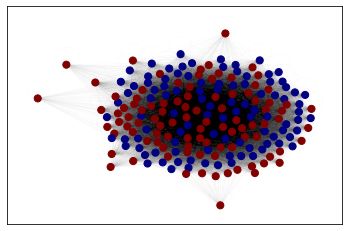


Graph G_tags
------------
Community 0:
    Category 'Gaming'
    [81 of 99]
    p(comm=0|cat=Gaming) = 0.8182
    Category 'Howto & Style'
    [16 of 96]
    p(comm=0|cat=Howto & Style) = 0.1667
Community 1:
    Category 'Gaming'
    [18 of 99]
    p(comm=1|cat=Gaming) = 0.1818
    Category 'Howto & Style'
    [80 of 96]
    p(comm=1|cat=Howto & Style) = 0.8333


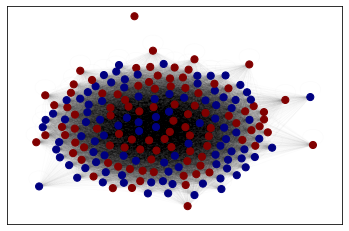

In [155]:
import networkx as nx

graphs = [("G_text", g_text), ("G_tags", g_tags)]

for gname, g in graphs:
    print(f"Graph {gname}")
    print("-" * len(f"Graph {gname}"))

    coms = nx.algorithms.community.kernighan_lin_bisection(g, maxiter=100, seed=42)
    for i, com in enumerate(coms):
        print(f"Community {i}:")
        for cat in categories:
            g_text_category = g_text.subgraph([x for x, y in g_text.nodes(data=True) if y['Category'] == cat])
            in_category = len([n for n in com if index_to_category[n] == cat])
            print(f"    Category '{cat}'\n    [{in_category} of {g_text_category.number_of_nodes()}]")
            p = in_category / g_text_category.number_of_nodes()
            print(f"    p(comm={i}|cat={cat}) = {p:.4f}")
            ps.append(p)

    # my_metric =
    # print(f"My metric: {my_metric}")

    pos = nx.spring_layout(g, k=2)
    ec = nx.draw_networkx_edges(g, pos, alpha=0.01)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=g.nodes(), node_color=[n in coms[0] for n in g.nodes],
                                node_size=50, cmap=plt.cm.jet)
    # plt.axis('off')
    plt.show()

    print()


2. If one of these graphs were ideal for this clustering task, what would the resulting communities look like? If it were the absolute worst possible graph for the task, what would the resulting communities look like?

**Comment:**

What would the communities literally look like? Well, There are two plots above, but they don't really tell much. According to the numbers above, we can se that the Gtext graph communities did not really match the categories we hoped them to match, they look more like randomly assigned the category (randomly in the sense of 50-50 chance for each node to pick the community). The Gtags graph was much better than that, with for example 81/99 Gaming category channels clustered together. That is much closer to the clustering into categories that we hope to see!

---


3. Calculate the probability $P(community|category)$ for each community and category within each graph. Design a metric, using the four $P(community|category)$ values in a graph, whose value would be 1 for the ideal graph and 0 for the worst graph. Calculate this metric for both graphs and compare the two. What do the results say about how representative tags and descriptions are regarding the channel categories? Are tags better suited, or descriptions?

**Comment:**

I computed the probabilities and printed them as well above, but will leave out implementing the metric. As a metric I would propose using the KL divergence between the expected and resulting distributions. The KL divergence should be computed twice, once for each community-category possibility (howto is either community 1 or community 2) and the minimum should be taken.

---


4. The Kernighan-Lin bisection you used above performs a min-edge cut: It attempts to partition the nodes of the graph into two sets of almost-equal size by deleting as few edges as possible. It starts off by creating a random partition of the nodes of the graph into two sets A and B that are almost equal in size, and then iteratively and in a greedy fashion moves nodes between A and B to reduce the number of edges between A and B. Show at least one toy example of a graph where the initialization could also be the final result. (Hint: Think of how, as we explained, the bisection algorithm relies on a minimum edge cut with a random initialization; under what circumstances could the original A and B be the best partition given that graph?)

Graph with 10 nodes and 8 edges


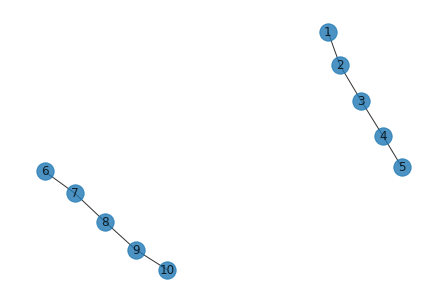

In [164]:
g = nx.Graph()
g.add_nodes_from(range(1, 11))
edges = list(zip(range(1, 5), range(2, 6))) + list(zip(range(6, 10), range(7, 11)))
g.add_edges_from(edges)

print(nx.info(g))
nx.draw_spring(g, with_labels=True, alpha=0.8)

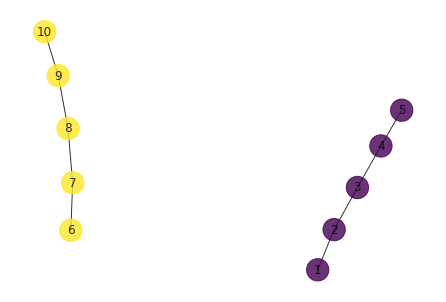

In [178]:
coms = nx.algorithms.community.kernighan_lin_bisection(g, seed=42, partition=[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)])
pos = nx.spring_layout(g, k=2)
nx.draw_spring(g, with_labels=True, alpha=0.8, node_color=[n in coms[0] for n in g.nodes], node_size=500)
plt.show()